# Web Services and Appications

## Topic02 Representing Data (XML and JSON)

###### **XML:** https://realpython.com/python-xml-parser/#xmldomminidom-minimal-dom-implementation <br> **JSON:** https://www.w3schools.com/js/js_json_intro.asp

DOM (Document Object Model):

DOM or Document Object Model is a programming interface for web documents. It creates an object-oriented representation of the structure and content of a web page as a tree structure, with nodes representing objects in the document.
Node Types: Nodes include element nodes, text nodes, attribute nodes, etc.
Hierarchy: Nodes have parent-child relationships, forming a hierarchical structure.
Node Examples: Document Node, Element Nodes, Text Nodes, Attribute Nodes.
> Module to navigate HTML and XML Dom trees: xml.dom.minidom.<br> ref: https://docs.python.org/3/library/xml.dom.minidom.html


#### Reading in XML data from Local file

In [4]:
# for navigating local files
from xml.dom.minidom import parse # import function used to parse XML files.
filename = "employees.xml" # get file path
# there are two ways to read in data
# alternative 1 - Direct Parsing (parse(filename)):It directly parses the XML file using the parse function (filename is a file path.)
doc = parse(filename)
# alternative 2 - Parsing via File Object (parse(fp)) within a *with* statement: It opens the file using a context manager (with statement) and parses the file object (fp) using the parse function.
                    #The with statement ensures proper resource management by automatically closing the file after the code block execution 
                    #even if errors occur during file operations or parsing, allowing for graceful exception handling
with open(filename) as fp:
    doc=parse(fp)

# check result
print(doc.toprettyxml(), end='')


<?xml version="1.0" ?>
<Company>
	
	
	<Employee category="Technical">
		
		
		<FirstName>
			Joe
		</FirstName>
		
		
		<LastName>
			Murphy
		</LastName>
		
		
		<ContactNo>
			1234567890
		</ContactNo>
		
	
	</Employee>
	
	
	<Employee category="Non-Technical">
		
		
		<FirstName>
			Mary
		</FirstName>
		
		
		<LastName>
			Martin
		</LastName>
		
		
		<ContactNo>
			1234667898
		</ContactNo>
		
	
	</Employee>
	

</Company>


##### Reading in XML from cloud / online source

In [10]:
# for navigating local files
import requests # requests library is used to make HTTP requests to web servers.
from xml.dom.minidom import parseString # parseString function used to parse XML data from strings

url="http://api.irishrail.ie/realtime/realtime.asmx/getCurrentTrainsXML" # define URL
page= requests.get(url) #Sends a GET request to the specified URL and stores the response in 'page'
doc= parseString(page.content) # parsing the XML content (which is in the form of a string) into a DOM (Document Object Model) structure

# print results
print(doc.toprettyxml(), end='')

<?xml version="1.0" ?>
<ArrayOfObjTrainPositions xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:xsd="http://www.w3.org/2001/XMLSchema" xmlns="http://api.irishrail.ie/realtime/">
	
  
	<objTrainPositions>
		
    
		<TrainStatus>N</TrainStatus>
		
    
		<TrainLatitude>51.9018</TrainLatitude>
		
    
		<TrainLongitude>-8.4582</TrainLongitude>
		
    
		<TrainCode>B211</TrainCode>
		
    
		<TrainDate>03 Feb 2024</TrainDate>
		
    
		<PublicMessage>B211\nCork to Mallow\nExpected Departure 10:00</PublicMessage>
		
    
		<Direction>To Mallow</Direction>
		
  
	</objTrainPositions>
	
  
	<objTrainPositions>
		
    
		<TrainStatus>N</TrainStatus>
		
    
		<TrainLatitude>51.9018</TrainLatitude>
		
    
		<TrainLongitude>-8.4582</TrainLongitude>
		
    
		<TrainCode>B507</TrainCode>
		
    
		<TrainDate>03 Feb 2024</TrainDate>
		
    
		<PublicMessage>B507\nCork to Cobh\nExpected Departure 10:00</PublicMessage>
		
    
		<Direction>To Cobh</Direction>
		
  
	</objTrainPositions>

#### Access data in XML (from local file)

In [16]:
# Get employee name by tags

# load module
from xml.dom.minidom import parse
# set file path
filename = "employees.xml"
#read in XML
doc = parse(filename)
#print(doc.toprettyxml(), end='')

employeeNodelist=doc.getElementsByTagName("Employee") #get everythin inside the Employee tag

for employeeNode in employeeNodelist: #itearate through each item inside Employee
    firstNameNode = employeeNode.getElementsByTagName("FirstName").item(0) #first item with a FirstName tag inside current employee
    firstName = firstNameNode.firstChild.nodeValue.strip() #value inside FirstName tag without extra spaces
    lastNameNode = employeeNode.getElementsByTagName("LastName").item(0) #first item with a LastName tag inside current employee
    lastName = lastNameNode.firstChild.nodeValue.strip() #value inside FirstName tag without extra spaces
    print(firstName, lastName)
#print source XML for reference
print("\nsource XML file structure\n")
print(doc.toprettyxml(), end='')
    

Joe Murphy
Mary Martin

source XML file structure

<?xml version="1.0" ?>
<Company>
	
	
	<Employee category="Technical">
		
		
		<FirstName>
			Joe
		</FirstName>
		
		
		<LastName>
			Murphy
		</LastName>
		
		
		<ContactNo>
			1234567890
		</ContactNo>
		
	
	</Employee>
	
	
	<Employee category="Non-Technical">
		
		
		<FirstName>
			Mary
		</FirstName>
		
		
		<LastName>
			Martin
		</LastName>
		
		
		<ContactNo>
			1234667898
		</ContactNo>
		
	
	</Employee>
	

</Company>


## JSON
JSON (JavaScript Object Notation) is a lightweight data interchange format used to transmit data between a server and a web application, for configuration files, and more. It's human-readable and easy to parse. It is simpler and more concise compared to XML.
**Key differences between XML and JSON:**
+ Format:
XML: Uses tags to define data elements and structure.
JSON: Uses key-value pairs to define data elements and structure.
+ Readability:
XML: Can be verbose and less readable due to tags and attributes.
JSON: Typically more concise and easier to read due to its simple syntax.
+ Data Types:
XML: Supports various data types and complex structures.
JSON: Primarily supports primitive data types (strings, numbers, booleans) and arrays/objects.
+ Parsing:
XML: Parsing XML documents usually requires specialized parsers.
JSON: Parsing JSON is straightforward and can be done with built-in functions in most programming languages.
+ Usage:
XML: Commonly used in web services, document storage, and configuration files.
JSON: Widely used for web APIs, AJAX requests, and exchanging data between web servers and clients due to its simplicity and efficiency.

### Read in JSON from local file

In [27]:
import json #json module, which provides functions for encoding and decoding JSON data.
filename = "wsaa2.4-json.json"# set file path

with open(filename, "r") as fp: #Opens the JSON file in read mode using a *with* statement, so the file is properly closed after finished, even if there is an error.
    jsonobject = json.load(fp)
#print (jsonobject)
#this is the structure:
'''
{'employees': 
    [
    {'firstName': 'John', 'lastName': 'Doe'},
    {'firstName': 'Anna', 'lastName': 'Smith'}, 
    {'firstName': 'Peter', 'lastName': 'Jones'}
    ]
}
'''
for employee in jsonobject["employees"]:
    print(employee["firstName"],employee["lastName"])

John Doe
Anna Smith
Peter Jones


### Read in JSON from online source / cloud

In [31]:
import requests
import json

url = "https://api.coindesk.com/v1/bpi/currentprice.json"
response = requests.get(url)#Sends an HTTP GET request to the specified URL and stores the response.
data = response.json()#parse data from JSON format into a python dictionary
# output result in a json file:
with open ("bitcoindump.json", "w") as fp:
    json.dump(data, fp)

#extract data:
bpi = data["bpi"] #bpi is the key or header or name of the whole python dictionary (Bitcoin Price Index)
#print(bpi)
rate = bpi["EUR"]["rate"] # this will find "bpi" -> "EUR" -> "rate"
print(rate)

39,830.742


In [ ]:

# this is the JSON structure (Bitcoin Price Index) starting from bpi is parsed into the python dictionary
'''
{
    "time": {
        "updated": "Feb 3, 2024 10:27:01 UTC",
        "updatedISO": "2024-02-03T10:27:01+00:00",
        "updateduk": "Feb 3, 2024 at 10:27 GMT"
    },
    "disclaimer": "This data was produced from the CoinDesk Bitcoin Price Index (USD). Non-USD currency data converted using hourly conversion rate from openexchangerates.org",
    "chartName": "Bitcoin",
    "bpi": {
        "USD": {
            "code": "USD",
            "symbol": "&#36;",
            "rate": "43,111.003",
            "description": "United States Dollar",
            "rate_float": 43111.0034
        },
        "GBP": {
            "code": "GBP",
            "symbol": "&pound;",
            "rate": "34,125.722",
            "description": "British Pound Sterling",
            "rate_float": 34125.7218
        },
        "EUR": {
            "code": "EUR",
            "symbol": "&euro;",
            "rate": "39,922.945",
            "description": "Euro",
            "rate_float": 39922.9447
        }
    }
}
'''

# Topic03 Data Transfer (HTTP, URL, Restful API, CURL and POSTMAN)


#### HTTP (Hypertext Transfer Protocol) 
is a communication protocol used for transferring data on the web. It allows web browsers to request and receive web pages and other resources from web servers. HTTP operates on a request-response model and uses methods like GET and POST to specify actions. HTTP provides methods like GET, POST, PUT, DELETE for clients to tell servers what they want to do with a resource. It also lays out how messages between clients and servers should look, including headers and body content. It's a stateless protocol, meaning each request is independent, but mechanisms like cookies enable stateful interactions.

#### common HTTP methods:
+ **GET:** Requests data from a specified resource. It should only retrieve data and should have no other effect.
+ **POST:** Submits data to be processed to a specified resource. It's often used when submitting forms or uploading files.
+ **PUT:** Updates a specified resource with new data. It replaces the entire resource if it exists or creates a new one if it doesn't.
+ **DELETE:** Deletes the specified resource.
+ **HEAD:** Similar to GET, but it requests only the headers of a resource without transferring the body content. It's used to retrieve metadata about a resource.
+ **OPTIONS:** Requests information about the communication options available for a specified resource. It helps the client understand what methods and other operations are supported.
+ **PATCH:** Applies partial modifications to a resource.
+ **TRACE:** Echoes back the received request, useful for testing or diagnosing.
+ **CONNECT:** Establishes a tunnel to the server identified by the target resource.
-------

**GET:**
Used to request data from a server.
Data is appended to the URL.
Limited amount of data can be sent.
Visible in browser history and logs.

**POST:**
Used to submit data to a server.
Data is sent in the request body.
Suitable for sensitive information.
Not visible in URL or browser history.

---
**HTTP status codes:**

| 1xx Informational | | | 2xx Success | | | 3xx Redirection | | | 4xx Client Error | | | 5xx Server Error |
|---|---|---|---|---|---|---|---|---|---|---|---|---|
| 100 | Continue | | 200 | OK | | 300 | Multiple Choices | | 400 | Bad Request | | 500 | Internal Server Error |
| 101 | Switching Protocols | | 201 | Created | | 301 | Moved Permanently | | 401 | Unauthorized | | 501 | Not Implemented |
| 102 | Processing | | 202 | Accepted | | 302 | Found (Moved Temporarily) | | 403 | Forbidden | | 502 | Bad Gateway |
| | | | 204 | No Content | | 304 | Not Modified | | 404 | Not Found | | 503 | Service Unavailable |
| | | | 206 | Partial Content | | 307 | Temporary Redirect | | 405 | Method Not Allowed | | 504 | Gateway Timeout |
| | | | | | | | | | 408 | Request Timeout | | 505 | HTTP Version Not Supported |
| | | | | | | | | | 429 | Too Many Requests | | |


### API / RESTful API

An API (Application Programming Interface) is a set of rules and tools that allows different software applications to communicate with each other. 

A **RESTful API** (Representational State Transfer API) is a type of API that follows the principles of REST architecture. It uses standard HTTP methods like GET, POST, PUT, DELETE to perform operations on resources, which are identified by URIs (Uniform Resource Identifiers). RESTful APIs are stateless, meaning each request from a client contains all the information necessary to process it. They are widely used for building web services and integrating different systems over the internet due to their simplicity, scalability, and flexibility.

**Statelessness:** Each request from a client to the server must contain all the information necessary to understand and fulfill the request. The server should not store any client context between requests. This simplifies the server implementation and improves scalability.

**Client-Server Architecture:** RESTful APIs separate the concerns of client and server. Clients are responsible for the user interface and user experience, while servers are responsible for data storage and processing. This separation allows for better scalability and modifiability of the components.

**Uniform Interface:** RESTful APIs define a uniform interface between clients and servers, typically using standard HTTP methods (GET, POST, PUT, DELETE) and resource identifiers (URLs). This makes the API easy to understand and use, and allows for loose coupling between clients and servers.

**Resource-Based:** RESTful APIs model resources as the key abstraction. Resources are identified by URIs (Uniform Resource Identifiers), and clients interact with resources through standard HTTP methods to perform CRUD (Create, Read, Update, Delete) operations.

**Representation:** Resources are typically represented in a format such as JSON (JavaScript Object Notation) or XML (eXtensible Markup Language). Clients and servers negotiate the representation of resources using standard media types (e.g., application/json).

Overall, RESTful APIs provide a scalable, flexible, and standardized way to build distributed systems that can be consumed by a variety of clients, including web browsers, mobile apps, and other services. They are widely used for building web APIs, microservices architectures, and integrating different systems and services over the internet.

**RESTful example**
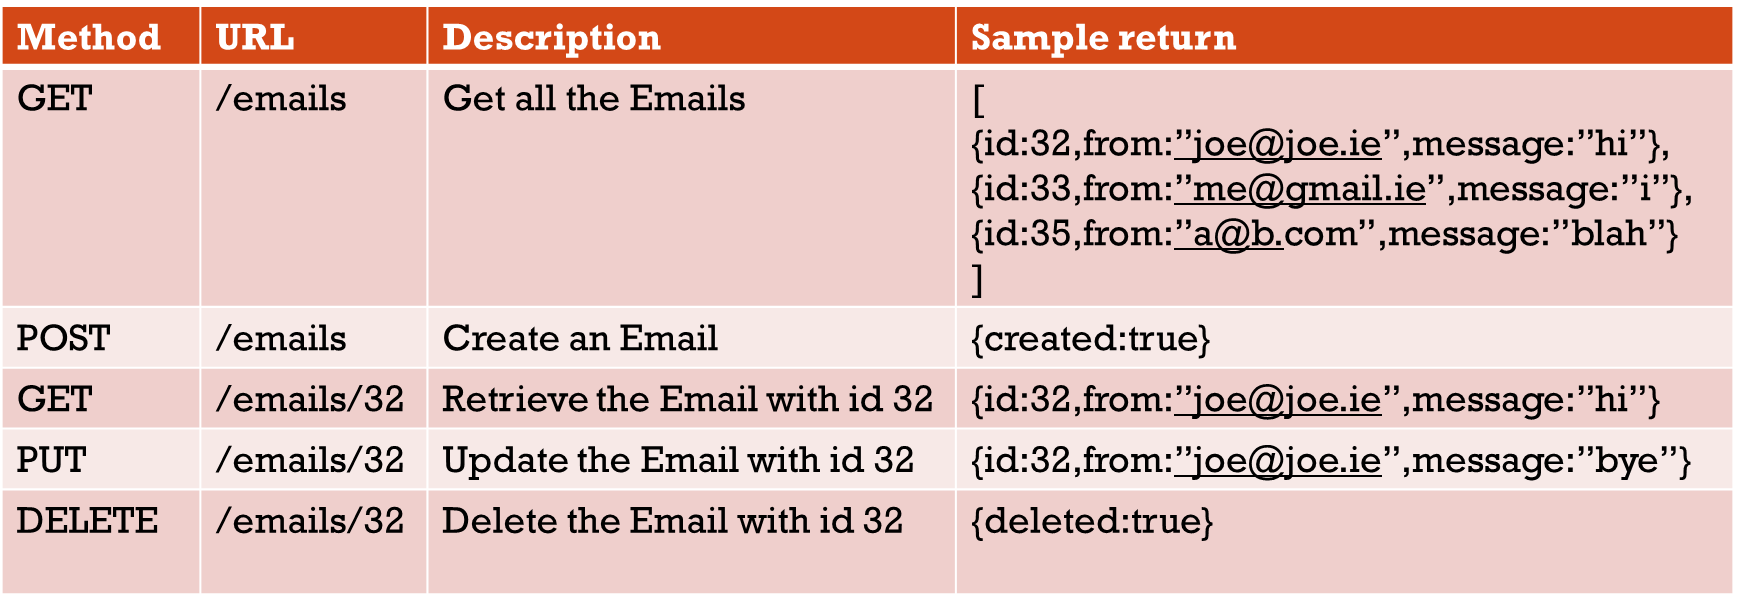<br> <br>

### CURL 
is a command-line tool used to transfer data with URLs. It supports various protocols like HTTP, HTTPS, FTP, and is commonly used for downloading files, testing APIs, and automating web-related tasks.<br>
*Some common use cases of CURL include:*
+ Downloading files from the internet.
+ Testing API endpoints by making HTTP requests.
+ Uploading files to a server.
+ Checking website availability and performance.
+ Automating tasks involving web services and APIs.


# Topic 4 <br> writing a modules to interact with API

#### Modules
**requests** is a popular Python library for making HTTP requests.
It simplifies interactions with web services and fetching data from URLs.
Key features include handling authentication, sessions, and automatic content decoding.
Install it via pip: python -m pip install requests.
Detailed documentation is available on Read the Docs.
In summary, requests makes HTTP communication in Python easy and efficient. 🌐🐍

**urllib.parse** The urlparse() function splits a URL string into its components.
It returns a 6-item named tuple representing the general structure of a URL: scheme://netloc/path;parameters?query#fragment.
Components include scheme, network location (netloc), path, parameters, query, and fragment.


In [ ]:
import urllib.parse
query = 'Hellö Wörld@Python'
parsed =  urllib.parse.quote(query)
print(parsed)
#'Hell%C3%B6%20W%C3%B6rld%40Python'

params = {'q': 'Python URL encoding', 'as_sitesearch': 'www.urlencoder.io'}
parsedparams = urllib.parse.urlencode(params)
print(parsedparams)
#'q=Python+URL+encoding&as_sitesearch=www.urlencoder.io'